In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import pandas as pd

df_stat = pd.read_csv("~/Documents/Studies/Modules/DatenanalyseLifeScience/Tasks/GeneClustering/resources/pawitan-death-stat.csv")
df_genes = pd.read_csv("~/Documents/Studies/Modules/DatenanalyseLifeScience/Tasks/GeneClustering/resources/pawitan-gene-expr.csv")

data = df_genes.iloc[:, 2:]

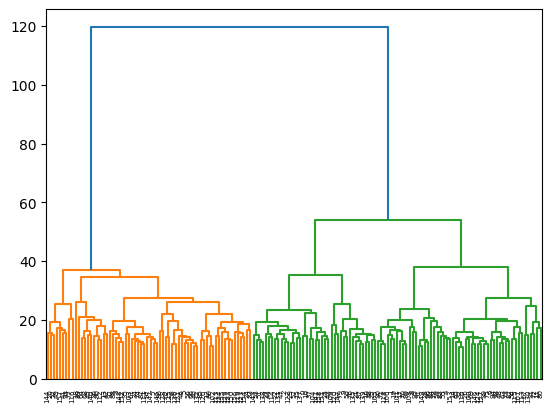

In [7]:
linkage_data = linkage(data.transpose(), method='ward', metric='euclidean')
dendrogram(linkage_data)


plt.show()

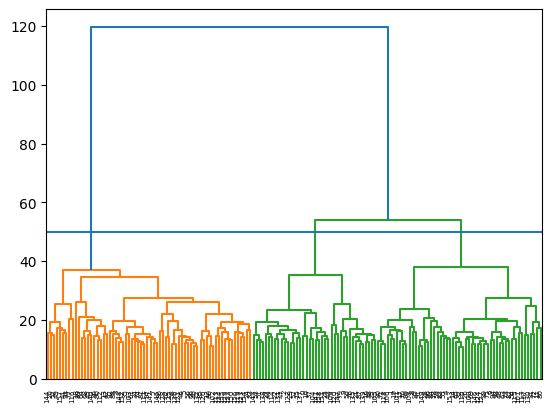

In [10]:

dendrogram(linkage_data)
plt.axhline(50)
plt.show()

In [13]:
cutree = cut_tree(linkage_data, height=50)

([<matplotlib.axis.XTick at 0x7ff1efa24b80>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

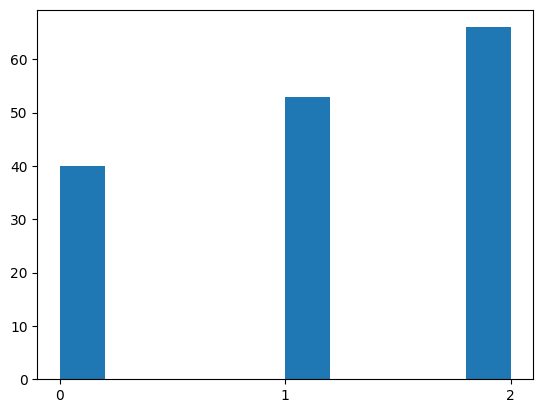

In [18]:
plt.hist(cutree)
plt.xticks([0,1,2])

In [19]:
df_stat.head()

,Unnamed: 0,ID_REF,RELAPSE,SURV_RELAPSE,DEATH,DEATH_BC,SURV_DEATH,SUBTYPE,ELSTON
0,0,X027JO,1.0,3.82,1.0,1.0,4.14,No Subtype,2.0
1,1,X350JO,0.0,8.15,0.0,0.0,8.15,Luminal B,3.0
2,2,X028JA,0.0,8.36,1.0,0.0,2.22,Luminal A,1.0
3,3,X126AS,0.0,8.23,0.0,0.0,8.23,No Subtype,2.0
4,4,X005JO,0.0,8.07,1.0,0.0,5.55,Luminal A,NaN


<BarContainer object of 3 artists>

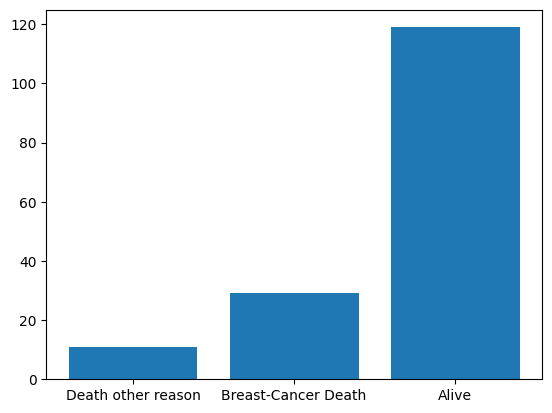

In [40]:
alive = (df_stat['DEATH'] == False).sum()
death_bc = (df_stat['DEATH_BC'] == True).sum()
death_other = (df_stat['DEATH'] -  df_stat['DEATH_BC']).sum()

plt.bar(x=['Death other reason', 'Breast-Cancer Death', 'Alive'], height=[death_other, death_bc, alive])

119